In [26]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# for showing progress 
from tqdm import tqdm

# sklearn imports
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

### Training Dataset

In [27]:
df_train = pd.read_csv('train_new.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label'])
df_train.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,label
4304,36,Private,167482,10th,6,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
6242,29,State-gov,293287,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
22925,32,Private,168981,HS-grad,9,Never-married,Adm-clerical,Other-relative,White,Female,0,0,35,United-States,0
25888,28,Private,148429,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
24907,42,Private,227065,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,32,United-States,1


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1   workclass        30162 non-null  object
 2   fnlwgt           30162 non-null  int64 
 3   education        30162 non-null  object
 4   educational-num  30162 non-null  int64 
 5   marital-status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   gender           30162 non-null  object
 10  capital-gain     30162 non-null  int64 
 11  capital-loss     30162 non-null  int64 
 12  hours-per-week   30162 non-null  int64 
 13  native-country   30162 non-null  object
 14  label            30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.5+ MB


### Testing  Dataset

In [29]:
df_test = pd.read_csv('test_new.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label'])
df_test.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,label
12783,22,Private,372898,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,0
3954,42,Private,46019,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,5178,0,50,United-States,1
6915,42,Self-emp-not-inc,152889,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52,United-States,0
8360,26,Private,129806,10th,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,0
5757,47,Federal-gov,114222,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,55,United-States,1


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              15060 non-null  int64 
 1   workclass        15060 non-null  object
 2   fnlwgt           15060 non-null  int64 
 3   education        15060 non-null  object
 4   educational-num  15060 non-null  int64 
 5   marital-status   15060 non-null  object
 6   occupation       15060 non-null  object
 7   relationship     15060 non-null  object
 8   race             15060 non-null  object
 9   gender           15060 non-null  object
 10  capital-gain     15060 non-null  int64 
 11  capital-loss     15060 non-null  int64 
 12  hours-per-week   15060 non-null  int64 
 13  native-country   15060 non-null  object
 14  label            15060 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.7+ MB


### Since the no. of columns after using one hot encoder is different we have to concatenate the test and train set

In [31]:
df = pd.concat([df_train, df_test])

### Checking if any field has null values

In [32]:
print('Train: \n', df.isnull().sum())
print()

Train: 
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
label              0
dtype: int64



### Removing Unwanted columns

In [33]:
df.drop(['education'], axis=1, inplace=True)

### Handling Categorical Data

In [34]:
print(df.select_dtypes(include=['object']).columns)

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')


In [35]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1]
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [36]:
cols = X.columns
categorical = list(X.select_dtypes(include=['object']).columns)
print(categorical)
for feature in categorical:
        X1 = pd.get_dummies(X[feature], prefix=feature, drop_first=True)
        X.drop([feature], axis=1, inplace=True)
        X = pd.concat([X1, X], axis=1)


['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [37]:
X.sample(10)

,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,...,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
11019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,44,257758,16,0,0,40
16186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,31,309974,10,0,0,40
6830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,39,98941,9,0,0,40
13709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,23,112683,10,0,0,12
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,46,187581,9,0,0,40
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20,111697,10,0,1719,28
2103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,24,166827,9,0,0,30
2456,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,26,336969,13,0,0,28
22937,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,25,259299,10,3103,0,50
19569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18,452452,6,0,0,20


### Normalizing data using StandardScaler

In [38]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,...,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-0.060145,-0.05005,-0.042621,-0.054311,-0.046364,-0.030851,-0.057107,-0.051365,-0.028226,-0.065469,...,-0.194353,-0.302710,4.715765,-0.021554,0.034201,-1.062295,1.128753,0.142888,-0.21878,-0.078120
1,-0.060145,-0.05005,-0.042621,-0.054311,-0.046364,-0.030851,-0.057107,-0.051365,-0.028226,-0.065469,...,-0.194353,3.303493,-0.212055,-0.021554,0.866417,-1.007438,1.128753,-0.146733,-0.21878,-2.326738
2,-0.060145,-0.05005,-0.042621,-0.054311,-0.046364,-0.030851,-0.057107,-0.051365,-0.028226,-0.065469,...,-0.194353,-0.302710,-0.212055,-0.021554,-0.041455,0.245284,-0.438122,-0.146733,-0.21878,-0.078120
3,-0.060145,-0.05005,-0.042621,-0.054311,-0.046364,-0.030851,-0.057107,-0.051365,-0.028226,-0.065469,...,-0.194353,-0.302710,-0.212055,-0.021554,1.093385,0.425853,-1.221559,-0.146733,-0.21878,-0.078120
4,-0.060145,-0.05005,-0.042621,18.412361,-0.046364,-0.030851,-0.057107,-0.051365,-0.028226,-0.065469,...,-0.194353,-0.302710,-0.212055,-0.021554,-0.798015,1.407393,1.128753,-0.146733,-0.21878,-0.078120


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
def sigmoid_function(z):
    return (1 / (1 + np.exp(-z)))

In [41]:
def cost_func(X, y, theta):
    hyp = sigmoid_function(X.dot(theta))
    return (-(y * np.log(hyp) + (1 - y) * np.log(1 - hyp))).mean()

## L1 regularization

In [42]:
def gradient_descent(X, y, epochs, alpha=0.1, lmb=0.2):
    X = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X.shape[1]).T
    cost_history, acc_history = [], []
    for i in tqdm(range(epochs)):
        y_pred = sigmoid_function(X.dot(theta))
        theta[1:] -= (alpha / X.shape[0]) * ((X[:, 1:]).T @ (y_pred - y) + (lmb * np.sign(theta[1:])))
        theta[0] -= (alpha / X.shape[0]) * (y_pred - y).T.dot(X[:, 0])
        cost = cost_func(X, y, theta)
        cost_history.append(cost)
        acc = accuracy_score(y, y_pred.round())
        acc_history.append(acc)
    return theta, cost_history, acc_history

In [43]:
theta1, cost_history1, acc_history1 = gradient_descent(X_train, y_train, 3000, 0.08, 0.5)
epochs = np.arange(3000)

100%|██████████| 3000/3000 [01:05<00:00, 45.65it/s]


### Error vs Iteration curve

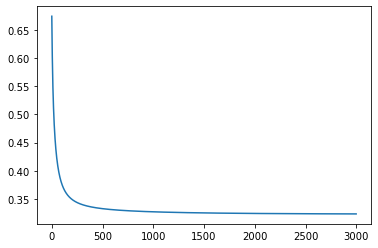

In [44]:
plt.plot(epochs, cost_history1)

### Accuracy vs Iteration curve

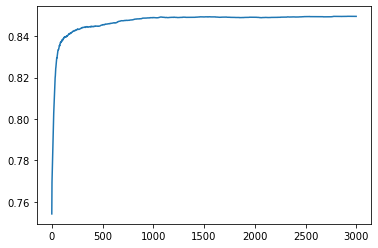

In [45]:
plt.plot(epochs, acc_history1)

In [46]:
def predict(X_test, theta):
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]
    y_pred = sigmoid_function(np.dot(X_test, theta))
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1
    return y_pred

In [47]:
len(theta1)

82

In [48]:
y_pred1 = predict(X_test, theta1)

In [49]:
acc1 = accuracy_score(y_test, y_pred1)
print(acc1)

0.8459497309648412


In [50]:
confusion_matrix(y_test, y_pred1, labels=[0, 1])

array([[9394,  748],
       [1342, 2083]])

## L2 Regularization

In [51]:
def gradient_descent(X, y, epochs, alpha=0.1, lmb=0.2):
    X = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X.shape[1]).T
    cost_history, acc_history = [], []
    for i in tqdm(range(epochs)):
        y_pred = sigmoid_function(X.dot(theta))
        theta[1:] -= (alpha / X.shape[0]) * ((X[:, 1:]).T @ (y_pred - y) + (lmb * theta[1:]))
        theta[0] -= (alpha / X.shape[0]) * (y_pred - y).T.dot(X[:, 0])
        cost = cost_func(X, y, theta)
        cost_history.append(cost)
        acc = accuracy_score(y, y_pred.round())
        acc_history.append(acc)
    return theta, cost_history, acc_history

In [52]:
theta2, cost_history2, acc_history2 = gradient_descent(X_train, y_train, 3000, 0.08, 0.5)
epochs = np.arange(3000)

100%|██████████| 3000/3000 [00:59<00:00, 50.78it/s]


### Error vs Iteration Curve

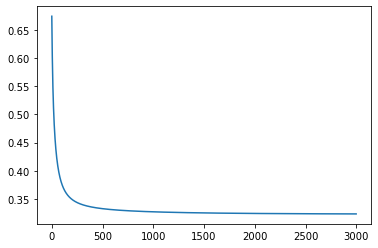

In [53]:
plt.plot(epochs, cost_history2)

### Error vs Accuracy Curve

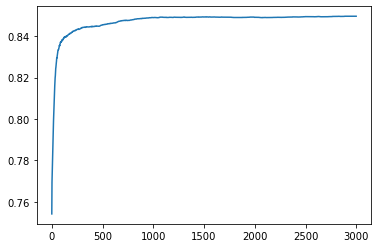

In [54]:
plt.plot(epochs, acc_history2)

In [55]:
y_pred2 = predict(X_test, theta2)

In [56]:
acc2 = accuracy_score(y_test, y_pred2)
print(acc2)

0.8459497309648412


In [57]:
confusion_matrix(y_test, y_pred2, labels=[0, 1])

array([[9393,  749],
       [1341, 2084]])

# Ques 2
Download the MNIST dataset from
http://yann.lecun.com/exdb/mnist/. Implement an L1 and L2 regularized logistic regression model using the scikit-learn library. Compute and report the accuracy obtained using one-vs-rest approach for each of the 10 classes, for both the training and test sets. Report the train and test
accuracy for both L1 and L2 regularized logistic regression. Comment on whether or not it is a good fit, i.e,underfitting or overfitting.

In [58]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X /= 255
y = y.astype(int)
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
y[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## L1 Regularization

In [61]:
clf1 = OneVsRestClassifier(LogisticRegression(penalty='l1', solver='liblinear')).fit(X_train, y_train)
y_decision1 = clf1.decision_function(X_test)

In [62]:
print("Testing accuracy (L1 Regularization): ", clf1.score(X_test, y_test))

Testing accuracy (L1 Regularization):  0.8283982683982684


In [63]:
print("Training accuracy (L1 Regularization): ", clf1.score(X_train, y_train))

Training accuracy (L1 Regularization):  0.849680170575693


## L2 Regularization

In [64]:
clf2 = OneVsRestClassifier(LogisticRegression(penalty='l2', solver='liblinear')).fit(X_train, y_train)
y_decision2 = clf2.decision_function(X_test)

In [65]:
print("Testing accuracy (L2 Regularization): ", clf2.score(X_test, y_test))

Testing accuracy (L2 Regularization):  0.8265367965367966


In [66]:
print("Training accuracy (L2 Regularization): ", clf2.score(X_train, y_train))

Training accuracy (L2 Regularization):  0.8502985074626865


## **Observation-**
Since the difference in accuracy between testing and training set in both the cases is similar (i.e. not significantly different) so we can say that there is no overfitting and the fit is good.

## ROC Curve for all the classes

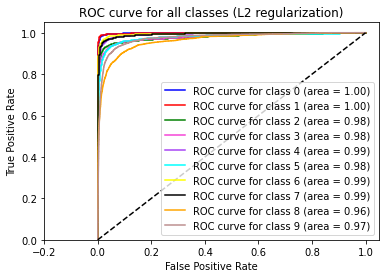

In [67]:

n_classes = 10
fpr2, tpr2, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
  fpr2[i], tpr2[i], _ = roc_curve(y_test[:, i], y_decision2[:, i])
  roc_auc[i] = auc(fpr2[i], tpr2[i])
colors = list(['blue', 'red', 'green', '#f542d7', '#a742f5', 'cyan', 'yellow', 'black', '#FFA500', '#BC8F8F'])
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr2[i], tpr2[i], color=color, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.2, 1.05])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all classes (L2 regularization)')
plt.legend(loc="lower right")
plt.show()